In [106]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",20)
data = pd.read_csv("data.set.csv",delimiter=';',encoding='latin1')
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
data["fiyat"] = data["fiyat"].str.replace(',', '.').astype(float)
data.rename(columns={'eðitim': 'egitim'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sütun1                4222 non-null   int64  
 1   id                    4220 non-null   float64
 2   fiyat                 4212 non-null   float64
 3   oda_salon_sayisi      4213 non-null   float64
 4   net_m2                4213 non-null   float64
 5   bina_yasi             4216 non-null   float64
 6   isinma_tipi           4218 non-null   object 
 7   krediye_uygunluk      4218 non-null   object 
 8   bulundugu_kat         4218 non-null   object 
 9   banyo_sayisi          4214 non-null   float64
 10  ilce                  4215 non-null   object 
 11  nüfus                 4214 non-null   float64
 12  egitim                4217 non-null   object 
 13  okuma_yazma_bilmeyen  4217 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 461.9+ KB


In [108]:
data.head(10)

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,egitim,okuma_yazma_bilmeyen
0,2612,2612.0,275000.0,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,4819.0,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,149.0,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,3628.0,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,3936.0,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"
5,2704,2704.0,110000.0,4.0,110.0,20.0,Kombi,Uygun,Bahçe Katý,1.0,Sincan,549108.0,Lise,"1,44"
6,3793,3793.0,347000.0,7.0,210.0,10.0,Kombi,Uygun,Teras Katý,2.0,Sincan,549108.0,Lise,"1,44"
7,1049,1049.0,495000.0,3.0,100.0,35.0,Merkezi,Uygun,Yüksek Giriþ,1.0,Çankaya,925828.0,Lisans,"0,7"
8,3313,3313.0,1250000.0,5.0,195.0,0.0,Merkezi(PayÖlçer),Uygun,4. Kat,2.0,Keçiören,938565.0,Lise,"1,43"
9,1566,1566.0,315000.0,4.0,115.0,22.0,Kombi,Uygun,En Üst Kat,1.0,Çankaya,925828.0,Lisans,"0,7"


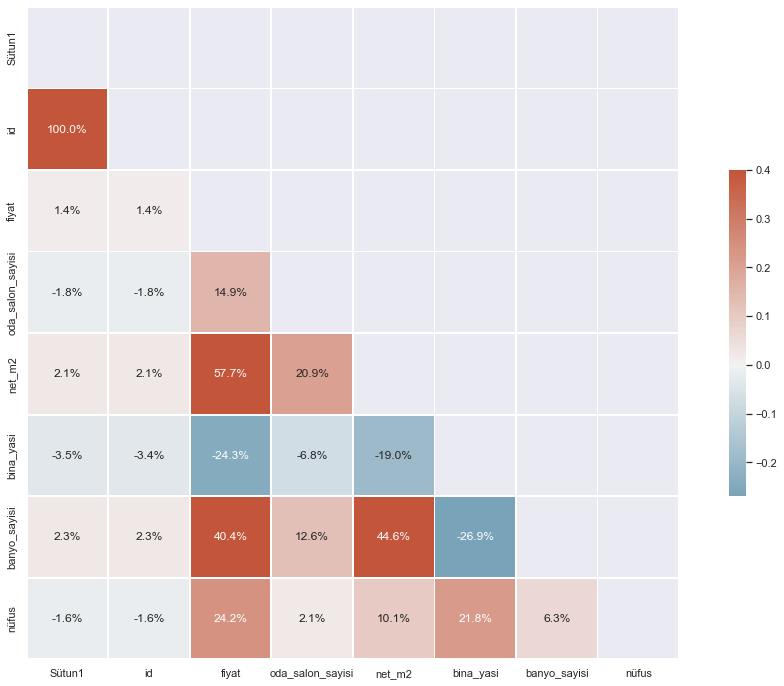

In [109]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(style="dark")
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, annot=True ,fmt='.1%')

In [110]:
data["ilce"].value_counts(dropna=False)

Keçiören    1778
Çankaya     1755
Sincan       615
Mamak         46
cankaya       21
NaN            7
Name: ilce, dtype: int64

In [111]:
data["ilce"] = data["ilce"].str.replace('cankaya', 'Çankaya')
data["ilce"].value_counts(dropna=False)

Keçiören    1778
Çankaya     1776
Sincan       615
Mamak         46
NaN            7
Name: ilce, dtype: int64

In [112]:
data["nüfus"].value_counts(dropna=False)

938565.0    1778
925828.0    1774
549108.0     616
669465.0      46
NaN            8
Name: nüfus, dtype: int64

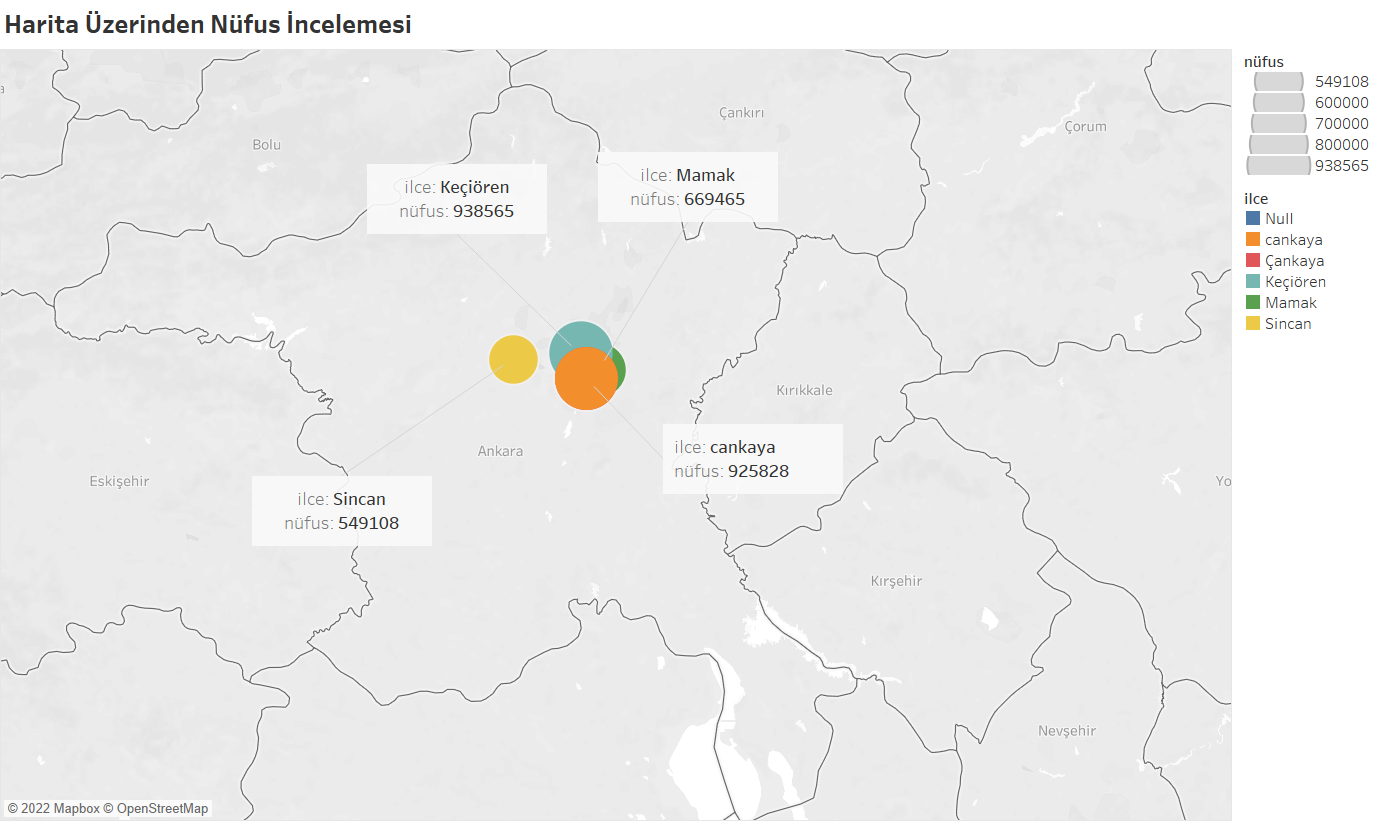

In [113]:
Image(r"C:\Users\Asus\Desktop\tüpraş_datathon\Sheet 3.png")

<span style="color:red"> Soru 1 </span> 
# Veri setini model kurmak için uygun bir hale getirelim. Bunun için de datayı biraz kurcalayalım.
* İlk olarak fiyat kolonunda negatif değer var mı ?
* Negatif m2 değeri var mıdır ? Bu değer için soru 2 içinde görselleştirme yapılmış ve gerekli düzenlemeler yapılmıştır.
* Sütun 1 ve id kolonları aynı işlevi görüp bir tanesi fazlalıktır. Bu kolonlardan birine drop işlemi uyguayabiliriz.
* Veri seti içinde tekrarlayan veri var mı ? (Duplicated values)

In [114]:
print("veri setinde 0 veya daha küçük değerde olan 'fiyat değerleri':", data[data["fiyat"] <= 0].shape[0])

veri setinde 0 veya daha küçük değerde olan 'fiyat değerleri': 0


In [115]:
data = data.drop(["id"], axis = 1)

In [116]:
print("Data içinde aynı verilere sahip olan satır sayısı: ", data.duplicated().sum())

# pandas drop_duplicates fonksiyonunu uygulayalım.
data = data.drop_duplicates()

print("Data içinde drop_duplicates işlemi uygulandıktan sonra aynı verilere sahip olan satır sayısı: ", data.duplicated().sum())

Data içinde aynı verilere sahip olan satır sayısı:  250
Data içinde drop_duplicates işlemi uygulandıktan sonra aynı verilere sahip olan satır sayısı:  0


# Nan values
* Sütun 1 ve id aynı olduğu için bunları aynı doldurabiliriz. (id kolonunu dopladık)
* ısınma tipi, krediye uygunluk ve ilçe en çok olan değere göre doldurabiliriz.
* nüfus eğitim okuma yazma bilmeyen kolonlarını doldurulan ilçelere göre aynı olacak şekilde doldurabiliriz.
* bina yaşı, net_m2 ve fiyatı ise ilgili ilçelerin ortalama, mod veya medianına göre doldurabiliriz.

In [117]:
data.isna().sum()

Sütun1                   0
fiyat                   10
oda_salon_sayisi         9
net_m2                   9
bina_yasi                6
isinma_tipi              4
krediye_uygunluk         4
bulundugu_kat            4
banyo_sayisi             8
ilce                     7
nüfus                    8
egitim                   5
okuma_yazma_bilmeyen     5
dtype: int64

In [118]:
data_nan = data[data.isna().any(axis=1)]
data_nan

,Sütun1,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,egitim,okuma_yazma_bilmeyen
15,525,268000.0,3.0,110.0,25.0,Kombi,Uygun,Kot 1,1.0,Çankaya,NaN,Lisans,"0,7"
69,3941,285000.0,NaN,110.0,28.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
123,1007,539000.0,4.0,125.0,22.0,NaN,Uygun,3. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
134,2556,425000.0,3.0,115.0,22.0,Kombi,Uygun,3. Kat,1.0,Keçiören,NaN,Lise,"1,43"
263,4505,735000.0,5.0,160.0,12.0,Kombi,Uygun,1. Kat,2.0,Keçiören,938565.0,Lise,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,1045,595000.0,4.0,120.0,20.0,Kombi,Uygun,2. Kat,2.0,Çankaya,925828.0,NaN,"0,7"
4150,2847,670000.0,5.0,185.0,2.0,Merkezi(PayÖlçer),Uygun,NaN,2.0,Çankaya,925828.0,Lisans,"0,7"
4204,3520,NaN,4.0,115.0,7.0,Kombi,Uygun,4. Kat,1.0,Sincan,549108.0,Lise,"1,44"
4214,1341,595000.0,4.0,100.0,50.0,Kombi,Uygun,Teras Katý,NaN,Çankaya,925828.0,Lisans,"0,7"


In [119]:
# Filling İlce Column
"""
data["ilce"] = ["Çankaya" if i == 925828 else 
                "Keçiören" if i == 938565 else
                "Sincan" if i == 549108 else 
                "Mamak" if i == 669465 else 0 for i in data["nüfus"]]"""

data.loc[data['nüfus'] == 938565.0, "ilce"] = "Keçiören"
data.loc[data['nüfus'] == 925828.0, "ilce"] = "Çankaya"
data.loc[data['nüfus'] == 549108.0, "ilce"] = "Sincan"
data.loc[data['nüfus'] == 669465.0, "ilce"] = "Mamak"

# Filling nüfus Column
"""
data["nüfus"] = [925828 if i == "Çankaya" else 
                 938565 if i == "Keçiören" else
                 549108 if i == "Sincan" else 
                 669465 if i == "Mamak" else 0 for i in data["ilce"]]"""

data.loc[data['ilce'] == "Keçiören", "nüfus"] = 938565.0
data.loc[data['ilce'] == "Çankaya", "nüfus"] = 925828.0
data.loc[data['ilce'] == "Sincan", "nüfus"] = 549108.0
data.loc[data['ilce'] == "Mamak", "nüfus"] = 669465.0

#EĞİTİM KOLONUNA BİRDAHA BAK AYNI İLÇEDEN FARKI SEVİYELER OLABİLİR.
# Filling eðitim Column
data.loc[data['ilce'] == "Keçiören", "egitim"] = "Lise"
data.loc[data['ilce'] == "Çankaya", "egitim"] = "Lisans"
data.loc[data['ilce'] == "Sincan", "egitim"] = "Lise"
data.loc[data['ilce'] == "Mamak", "egitim"] = "Lise"

In [120]:
ısıtma  = pd.DataFrame(data["isinma_tipi"].value_counts(dropna= False))
ısıtma.style.background_gradient(cmap='Oranges')

,isinma_tipi
Kombi,2861
Merkezi,696
Merkezi(PayÖlçer),403
KatKaloriferi,5
nan,4
Klima,3


In [121]:
data["ısıtma_tipi"] = data["isinma_tipi"].fillna("Kombi")

# fiyat değerlerindeki kayıp veriler için en uyumlu olduğu kolon net_m2 kullanılabilir.
#(corr matrix'de farkedilebilir.)
data["net_m2"]  = data["net_m2"].astype(float)

"""daha da ayrıntılı bir şekilde dolduracak olursak ilgili kayıp verinin,
 ait olduğu ilçeye göre ortalama m2 bilgisi alındı"""

data['fiyat'] = data['fiyat'].fillna(data.groupby(['ilce','net_m2'])['fiyat'].transform('mean'))
# Datamızda bulunan diğer kolonların missing value işlemleri, yukarıdaki örneğe paralel olarak gerçekleştirilebilir.

* Target column olan "fiyat" için outlier kontrolü yapalım.
* Bu fonksiyon içinde data dağılımı ile değişkenlik gösteren IQR* "1.5" değeri veya IQR * "3" kullanılabilir.

In [122]:
import collections
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c],25)
        #3st quartile
        Q3=np.percentile(df[c],75)
        #IQR 
        IQR=Q3-Q1
        #outlier step
        outlier_step=IQR*1.5
        #detect outlier
        outlier_list_col=df[(df[c] < Q1-outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices = collections.Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outlier_indices.items() if v > 2)
        
    return multiple_outliers

outliers_index = detect_outliers(data,['fiyat'])
print(len(outliers_index))

0


* Fiyat kolonu içinde bulunan değerlerin dağılım grafiği; (with tableau)

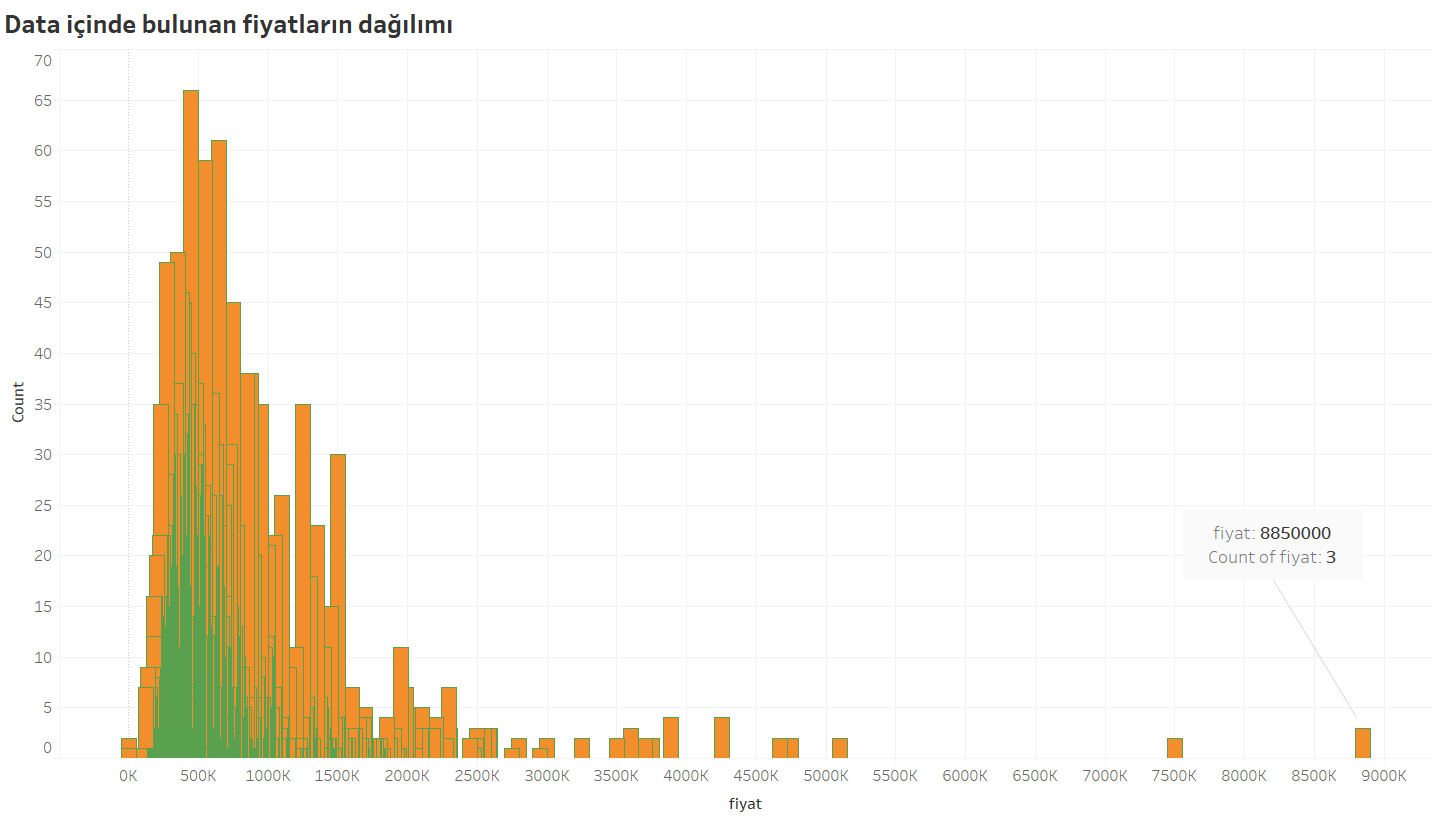

In [123]:
Image(r"C:\Users\Asus\Desktop\tüpraş_datathon\Sheet 4.png")

<span style="color:red"> Soru 2 </span> 
* Görselleştirme için tableau görselleştirme aracı kullanılmış olup m2, bina yaşı ve fiyat kolonları parametre olarak kullanılmıştır.
* Data içerisinde negatif değerde olan m2 değerleri gözlenmiştir. 
* m2 değeri 0 olan ancak çok yüksek bir fiyata sahip olan ilan datadan çıkartılabilir veya ilgili değerlerine göre ortalama bir fiyata atanabilir.
* Negatif m2 değerlere sahip satırlar için pozitifleştirilip 40 m2 altında olan evleri datadan silebiliriz.
* Görselleştirme de farkedildiği üzere 0 m2 değerine sahip ancak oldukça pahalı olan ev hatalı değerler içermektedir.
* İlgili satır datadan filtrelenerek daha sağlıklı bir model kurulabilir.

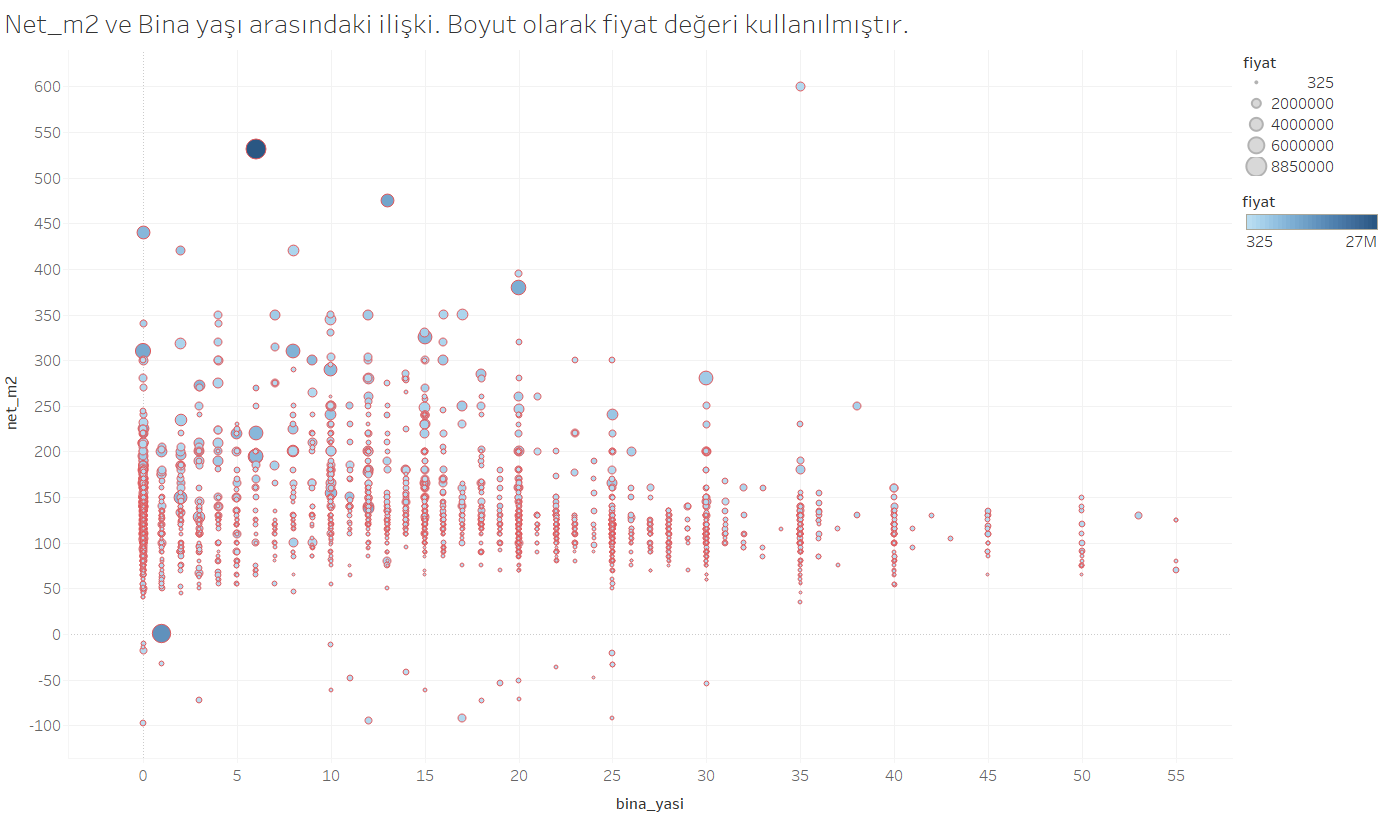

In [124]:
Image(r"C:\Users\Asus\Desktop\tüpraş_datathon\Sheet 2.png")

# Bir sonraki işlem olarak negatif olan m2 değerlerini pozitifleştirelim. Bu işlem aynı zamanda 1. soru ile alakalıdır.

In [125]:
data["net_m2"] = [i * -1 if i <0 else i for i in data["net_m2"]]
print("İlgili Düzenlemeler yapıldıktan sonra negatif olan m2 değerleri: ", data[data['net_m2']< 0].shape[0])

# Aynı zamanda 40 dan daha küçük bir değere sahip olan m2 değerlerini de filtreleyelim. 
data_V2 = data[data["net_m2"] >= 40]

print("*"*100)
print("Data'nın ham halinin uzunluğu :", data.shape[0],"\nDüzenlenmiş datanın uzunluğu", data_V2.shape[0])
# Bu process ile birlikte 22 satır veriyi datamızdan atmak zorunda kaldık
# mvcut treshold tekrar gözden geçirilip düzenlenebilir.

İlgili Düzenlemeler yapıldıktan sonra negatif olan m2 değerleri:  0
****************************************************************************************************
Data'nın ham halinin uzunluğu : 3972 
Düzenlenmiş datanın uzunluğu 3951


<span style="color:red"> Soru 3 </span> 
# ilk olarak 2.kat altı olan evleri filtreleyelim. daha sonra ısınma tipi ve ilçeye göre gruplayarak istediğimiz değerlere ulaşalım.

In [126]:
kat = pd.DataFrame(data["bulundugu_kat"].value_counts())
kat.style.background_gradient(cmap='Dark2')
# buradan çıkarılacak değerler (kot 2 ve kot 3 ün 2. kat yüksekliğinde olduğunu varsayalım)
# Yüksek Giriþ,Giriþ Katý,Bahçe Katý,Zemin,Bodrum,Villa Katý, Kot 1, Kat 1.

,bulundugu_kat
3. Kat,668
2. Kat,654
1. Kat,644
4. Kat,347
Yüksek Giriþ,337
Kot 1,259
Giriþ Katý,183
Bahçe Katý,122
5. Kat,118
Kot 2,112


In [127]:
# filter 
data_filter = data[(data['bulundugu_kat']!='Yüksek Giriþ') & (data['bulundugu_kat']!='Giriþ Katý')
                  &(data['bulundugu_kat']!='Bahçe Katý') & (data['bulundugu_kat']!='Zemin')
                  &(data['bulundugu_kat']!='Bodrum') & (data['bulundugu_kat']!='Villa Katý')
                  & (data['bulundugu_kat']!='1. Kat') & (data['bulundugu_kat']!='Kot 1')]

kat_s = pd.DataFrame(data_filter.groupby(by=["ilce" ,"isinma_tipi"])["fiyat"].count())
kat_s.style.background_gradient(axis = 1, cmap='Dark2')

# Yüksek Giriþ,Giriþ Katý,Bahçe Katý,Zemin,Bodrum,Villa Katý değerleri kat kolonundan çıkarıldı.

* Datadaki değerlerin bazı karakter gösterimlerinde farklılık olup ",encoding='latin1" parametresi ile alakalıdır.
* Replace metodu ile ilgili düzenlemeler yapılabilir.

# İstenen filtreler uygulandıktan sonra
* Keçiören "233" Merkezi , "130" Merkezi (Payölçer) ısıtma tipine,
* Mamak "1" Merkezi ısıtma tipine,
* Sincan "10" Merkezi, "73" Merkezi (PayÖlçer) ısıtma tipine,
* Çankaya "254" Merkezi ve "129" Merkezi(PayÖlçer) ısıtma sistemine sahiptir.

<span style="color:red"> Soru 4 </span> 
# eğitim düzeyi lisans olanların oranının yüksek olduğu ve fiyatı 5000 tl'den az olan bir evde oturmak isteyenler hangi ilçedeki evlere bakmalı.
* İlk olarak ilce ve eğitim kolonlarını gruplayarak fiyat üzerinden ortalamalarını inceleyelim.
* Bu operasyon sonucu bazı farklı isimlendirme tipleri olduğu farkedildi. İlk olarak bunları düzenleyelim.

In [128]:
data[data["egitim"]=="liS3"] = "Lise"
data[data["egitim"]=="liSans"] = "Lisans"

In [129]:
data["fiyat"] = data["fiyat"].astype("float")
egitim = pd.DataFrame(data.groupby(["ilce","egitim"])["fiyat"].mean())
egitim.style.background_gradient(cmap='Set1')


,,fiyat
ilce,egitim,
Keçiören,Lise,662412.151647
Mamak,Lise,289654.761905
Sincan,Lise,298206.863571
Çankaya,Lisans,665143.724430


* Eğitm düzeyi lisans olanlar Çankaya ilinde yoğun olarak yaşamaktadır. 
* Çankaya ili için filterelenecek değer soru içinde "5000" yazılmış olup bu değerin aslında 500 000 TL altı ev olarak yazılmak istendiğini varsayıyorum. Filtre işlemimi bu varsayıma göre devam ettirerek devam ettiğimiz taktirde;

In [130]:
data_filter_2 = data[(data['ilce']=='Çankaya') & (data['fiyat']<= 500000)]
data_filter_2.style.background_gradient(cmap='YlOrBr_r')
# Filtreleme işleminden sonra mevcut data

,Sütun1,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,egitim,okuma_yazma_bilmeyen,ısıtma_tipi
0,2612,275000.000000,4.000000,120.000000,12.000000,Kombi,Uygun,Kot 1,1.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi
7,1049,495000.000000,3.000000,100.000000,35.000000,Merkezi,Uygun,Yüksek Giriþ,1.000000,Çankaya,925828.000000,Lisans,"0,7",Merkezi
9,1566,315000.000000,4.000000,115.000000,22.000000,Kombi,Uygun,En Üst Kat,1.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi
11,1086,439000.000000,4.000000,135.000000,12.000000,Kombi,Uygun,Kot 2,2.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi
15,525,268000.000000,3.000000,110.000000,25.000000,Kombi,Uygun,Kot 1,1.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi
16,1010,444000.000000,4.000000,110.000000,20.000000,Kombi,Uygun,1. Kat,2.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi
20,1183,419000.000000,4.000000,110.000000,28.000000,Kombi,Uygun,3. Kat,1.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi
28,4674,440000.000000,4.000000,124.000000,36.000000,Merkezi,Uygun,Giriþ Katý,1.000000,Çankaya,925828.000000,Lisans,"0,7",Merkezi
33,2408,425000.000000,4.000000,100.000000,35.000000,Merkezi,Uygun,3. Kat,1.000000,Çankaya,925828.000000,Lisans,"0,7",Merkezi
42,879,450000.000000,4.000000,110.000000,1.000000,Kombi,Uygun,Kot 1,2.000000,Çankaya,925828.000000,Lisans,"0,7",Kombi


In [131]:
print("istenilen filtrelemeler yapıldıktan sonra bulunan ilan sayısı:", data_filter_2.shape[0])

istenilen filtrelemeler yapıldıktan sonra bulunan ilan sayısı: 825


<span style="color:red"> Soru 5 </span> 
# İlçelere göre ısınma türlerinden hangisinin daha uygun fiyatta olduğunun incelenmesi. 
# Basit bir gruplama ile her ilçedeki evlerin fiyat ortalamaları ve median değerleri gözlemlendi. Outlier değerlerin var olduğu varsayılarak ortalama üzerine etkilerinin olup olmadığı için median değerleri de incelendi.
* Gruplama için İlçe ve ısıtma tipleri kullanıldı. 
* Ortalama değerin yanıltıcı olmaması için median değerleri de incelendi.
* Bazı ilçelerde ısıtma tipleri sayısı değişkenlik gösterip datastindeki boyutuyla alakalı olduğu gözlemlendi.
* İlçe ve ısınma tipi alfabetik sıra, ortalama değerler ise azalan sıra ile tablolaştırıldı.

In [55]:
# Nan olan Valuelar daha önceki adımlarda doldurulmuştu. 
# Orjinal data içerisinde, Isınma tipi kolonunda 4 adet Nan value değerimiz vardır.
data["isinma_tipi"].value_counts(dropna= False)

Kombi                2861
Merkezi               696
Merkezi(PayÖlçer)     403
KatKaloriferi           5
NaN                     4
Klima                   3
Name: isinma_tipi, dtype: int64

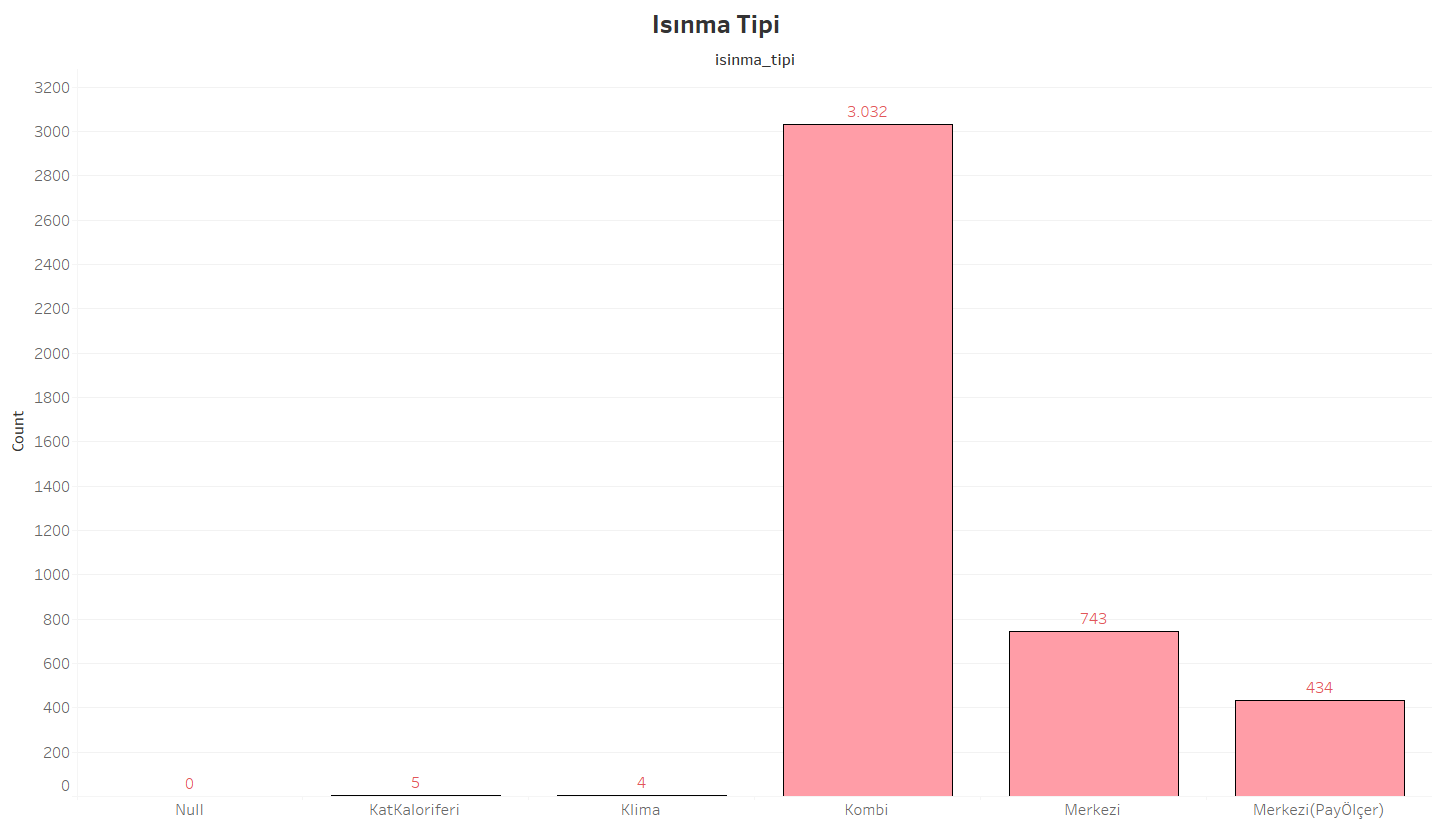

In [105]:
Image(r"C:\Users\Asus\Desktop\tüpraş_datathon\Sheet 8.png")

In [30]:
#pd.options.display.float_format = '${:,.2f}'.format
group = pd.DataFrame(data.groupby(by=["ilce" ,"isinma_tipi"])["fiyat"].agg([np.mean, np.median])).sort_values(["ilce","mean","isinma_tipi"], ascending=False)
group.style.background_gradient(axis=0, cmap='Pastel2')